In [1]:
pip install mrjob

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

In [ ]:

df = pd.read_csv("C:/Users/aishw/Downloads/forestfires - forestfires.csv")

In [4]:

df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [6]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [8]:
from mrjob.job import MRJob

In [9]:
import sys
sys.argv = ['avg_temperature.py', 'forestfires.csv']  # Simulating command-line args

In [12]:
!python "C:/Users/Admin/Downloads/avg_temperature.py" 
"C:/Users/Admin/Downloads/forestfires.csv"


python: can't open file 'C:\\Users\\Admin\\Downloads\\avg_temperature.py': [Errno 2] No such file or directory


'C:/Users/Admin/Downloads/forestfires.csv'

In [13]:
!pip install pyhive pandas seaborn matplotlib
!pip install thrift thrift-sasl pyhive pandas seaborn matplotlib

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pyhive: filename=PyHive-0.7.0-py3-none-any.whl size=53909 sha256=199d768193449f41a5079ca16f4c66735e72c379b7795de4abd9f2808aadd028
  Stored in directory: c:\users\aishw\appdata\local\pip\cache\wheels\27\2a\68\cfd081f4e5b676546fd54c3deb5f4db323666b8441cdd91a1b
Successfully built pyhive
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for thrift: filename=thrift-0.21.0-py3-none-any.whl size=196403 sha256=250dad75e1678dbe90acf251f4073c8db1f8e7bb7c353d90aa0704e0d03dbfe1
  Stored in directory: c:\users\aishw\appdata\local\pip\cache\wheels\d7\bf\f8\453cd3d09ca37516087388a3409585ba20c57117a5a39e092f
  Created wheel for pure-sasl: filename=pure_sasl-0.6.2-py3-none-any.whl size=11438 sha256=3f77561d88b104681

In [14]:
# Group by month and count occurrences
monthly_count = df.groupby('month').size().reset_index(name='count')
print(monthly_count)

   month  count
0    apr      9
1    aug    184
2    dec      9
3    feb     20
4    jan      2
5    jul     32
6    jun     17
7    mar     54
8    may      2
9    nov      1
10   oct     15
11   sep    172


In [15]:
# Perform other aggregations or queries
temperature_avg = df.groupby('month')['temp'].mean()
print(temperature_avg)

month
apr    12.044444
aug    21.631522
dec     4.522222
feb     9.635000
jan     5.250000
jul    22.109375
jun    20.494118
mar    13.083333
may    14.650000
nov    11.800000
oct    17.093333
sep    19.612209
Name: temp, dtype: float64


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

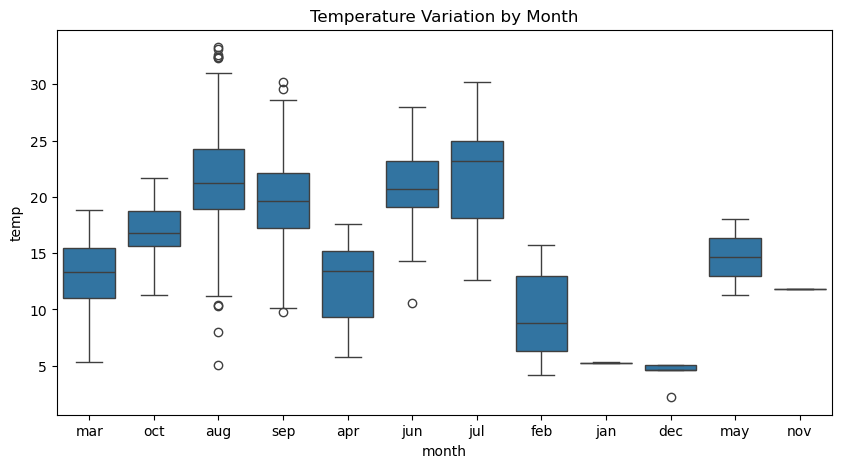

In [17]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['month'], y=df['temp'])
plt.title("Temperature Variation by Month")
plt.show()

In [18]:
import sqlite3

In [ ]:
# Create/Connect to SQLite database
conn = sqlite3.connect('forestfires.db')

# Write the DataFrame to the SQLite database
df.to_sql('forestfires', conn, if_exists='replace', index=False)

# Optional: Check if data is loaded correctly
cursor = conn.cursor()
cursor.execute("SELECT * FROM forestfires LIMIT 5")
data = cursor.fetchall()
print(data)

# Close the connection
conn.close()


[(7, 5, 'mar', 'fri', 86.2, 26.2, 94.3, 5.1, 8.2, 51, 6.7, 0.0, 0.0), (7, 4, 'oct', 'tue', 90.6, 35.4, 669.1, 6.7, 18.0, 33, 0.9, 0.0, 0.0), (7, 4, 'oct', 'sat', 90.6, 43.7, 686.9, 6.7, 14.6, 33, 1.3, 0.0, 0.0), (8, 6, 'mar', 'fri', 91.7, 33.3, 77.5, 9.0, 8.3, 97, 4.0, 0.2, 0.0), (8, 6, 'mar', 'sun', 89.3, 51.3, 102.2, 9.6, 11.4, 99, 1.8, 0.0, 0.0)]
